In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment (1).csv


In [9]:
#dataset
data = pd.read_csv("CarPrice_Assignment.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
#Hapus data bernilai NaN /NULL
data.dropna(axis = 0, inplace = True)
print(data.head)
print(data.columns)
print(data.price.value_counts())

<bound method NDFrame.head of      car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible     

In [12]:
# Select features and target variable
X = np.asarray(data[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']])
y = np.asarray(data['symboling'])
#normalization of the dataset
X = preprocessing.StandardScaler().fit(X).transform(X)

#Train-and-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=4)
print('Train set : ', X_train.shape, y_train.shape)
print('Test set : ', X_test.shape, y_test.shape)


Train set :  (143, 10) (143,)
Test set :  (62, 10) (62,)


In [13]:
# Create a decision tree model
model = DecisionTreeClassifier()

Akurasi: 0.79
              precision    recall  f1-score   support

          -2       0.50      1.00      0.67         1
          -1       0.29      0.40      0.33         5
           0       0.88      0.74      0.80        19
           1       0.89      0.85      0.87        20
           2       0.82      1.00      0.90         9
           3       0.86      0.75      0.80         8

    accuracy                           0.79        62
   macro avg       0.71      0.79      0.73        62
weighted avg       0.82      0.79      0.80        62



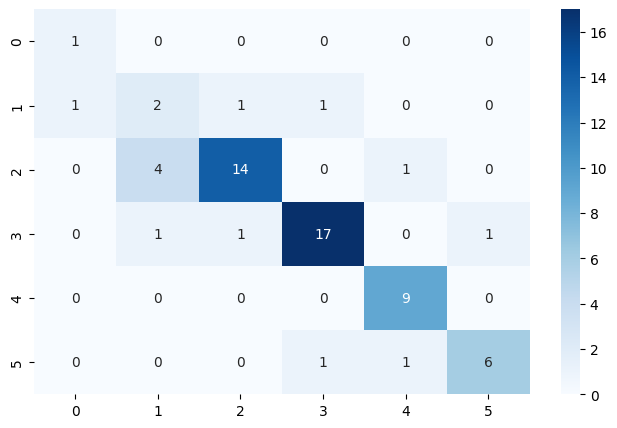

Confusion Matrix:
[[ 1  0  0  0  0  0]
 [ 1  2  1  1  0  0]
 [ 0  4 14  0  1  0]
 [ 0  1  1 17  0  1]
 [ 0  0  0  0  9  0]
 [ 0  0  0  1  1  6]]


In [17]:
# Melatih model pada data latih
#fitting the model
model.fit(X_train, y_train)

# Memprediksi label pada data uji
Y_pred = model.predict(X_test)

# Mengukur akurasi model
accuracy = accuracy_score(y_test, Y_pred)
print(f"Akurasi: {accuracy:.2f}")

# Menampilkan laporan klasifikasi
print(classification_report(y_test, Y_pred))

# Menampilkan confusion matrix
# Menampilkan confusion matrix
plt.figure(figsize = (8, 5))
conf_mat = confusion_matrix(y_test, Y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap="Blues")
plt.show()
print("Confusion Matrix:")
print(confusion_matrix(y_test, Y_pred))